# mod3b: Gramian Angular Summation Field (GASF) transformation

In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'dashlink/'

In [0]:
from fastai.vision import *

In [0]:
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [0]:
# set output folder
outpath = Path('png3b'); outpath

PosixPath('png3b')

In [0]:
! ls -alh "{trnpath}"/{outpath}

total 99M
-rw------- 1 root root  99M Sep 17 17:52 export.pkl
drwx------ 2 root root 4.0K Sep 14 12:58 models
drwx------ 2 root root 4.0K Sep 13 18:35 non
drwx------ 2 root root 4.0K Sep 13 18:35 typ


## Ingest data

In [0]:
trnpath/outpath

PosixPath('/content/gdrive/My Drive/dashlink/Train/png3b')

In [0]:
# form item list
il = ImageList.from_folder(trnpath/outpath)

In [0]:
il.items[0]

PosixPath('/content/gdrive/My Drive/dashlink/Train/png3b/typ/687200104111158-1min.png')

In [0]:
il

ImageList (1080 items)
Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130)
Path: /content/gdrive/My Drive/dashlink/Train/png3b

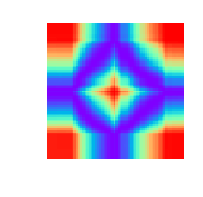

In [0]:
il[21].show()

In [0]:
! ls "{trnpath}"/{outpath}

export.pkl  models  non  typ


In [0]:
# form train and valid item lists
#set seed to always get the same validation set:
ils = il.split_by_rand_pct(valid_pct=0.2, seed=787); type(ils); ils

ItemLists;

Train: ImageList (864 items)
Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130)
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Valid: ImageList (216 items)
Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130)
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Test: None

In [0]:
# form label lists
lls = ils.label_from_folder(); lls

LabelLists;

Train: LabelList (864 items)
x: ImageList
Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Valid: LabelList (216 items)
x: ImageList
Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130),Image (3, 130, 130)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Test: None

In [0]:
x,y = lls.train[7]; x,y

(Image (3, 130, 130), Category typ)

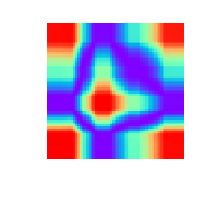

In [0]:
x.show()

In [0]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0.0, max_zoom=1, 
                      max_lighting=0, max_warp=0)

In [0]:
# lls = lls.transform(tfms)
lls = lls.transform(tfms, size=128)

In [0]:
# bs = 8
# bs = 16
bs = 32
# bs = 64

In [0]:
data = lls.databunch(bs=bs).normalize(imagenet_stats)

In [0]:
x,y = data.train_ds[4]

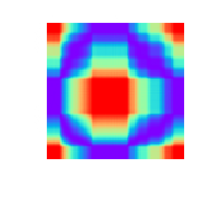

In [0]:
x.show(); y
# plt.savefig(os.path.join(f'{trnpath/outpath}/sample.png'), dpi=600, format='png', bbox_inches='tight')

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

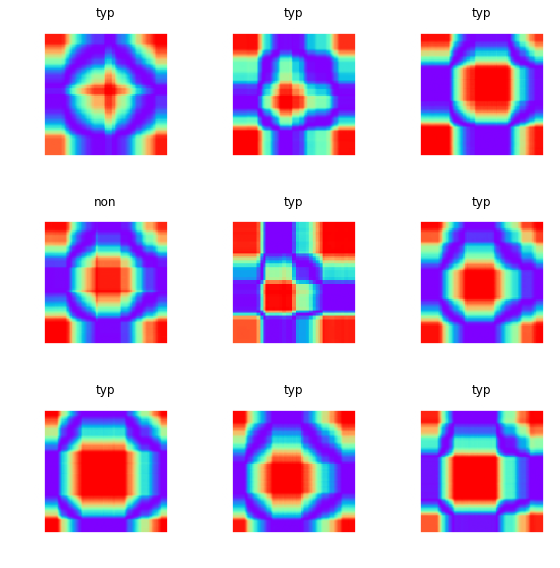

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes

['non', 'typ']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non', 'typ'], 2, 864, 216)

## Train model

In [0]:
# arch = models.resnet18
# arch = models.resnet34
arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch, 
                    metrics=[FBeta(average='binary',pos_label=1,beta=1), 
                             Precision(),                             
                             Recall(), 
                             error_rate,
                             accuracy]
                    #,ps=0, wd=0, true_wd=False, bn_wd=False                   
                    )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


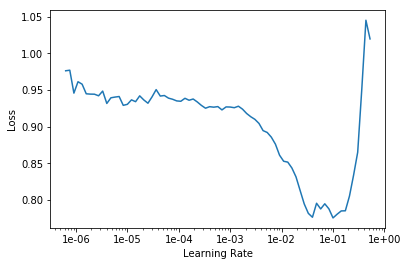

In [0]:
learn.lr_find()
#learn.lr_find(start_lr=1e-07, end_lr=10)
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(8, slice(lrf))

# learn.fit_one_cycle(16, slice(2e-3)) #
# learn.fit_one_cycle(16, slice(3e-3)) #
# learn.fit_one_cycle(16, slice(4e-3)) #
# learn.fit_one_cycle(16, slice(5e-3)) #
# learn.fit_one_cycle(16, slice(6e-3)) #
# learn.fit_one_cycle(32, slice(7e-3)) #
# learn.fit_one_cycle(16, slice(8e-3)) #
# learn.fit_one_cycle(16, slice(9e-3)) #
# learn.fit_one_cycle(16, slice(1e-2)) #
learn.fit_one_cycle(8, slice(2e-2)) #
# learn.fit_one_cycle(16, slice(3e-2)) #

epoch,train_loss,valid_loss,f_beta,precision,recall,error_rate,accuracy,time
0,0.699512,0.398076,0.917526,0.946809,0.890000,0.148148,0.851852,00:07
1,0.441575,0.222882,0.963325,0.942584,0.985000,0.069444,0.930556,00:07
2,0.353578,0.356445,0.963855,0.930233,1.000000,0.069444,0.930556,00:07
3,0.358077,0.220699,0.967901,0.956098,0.980000,0.060185,0.939815,00:07
4,0.253252,0.355007,0.966184,0.934579,1.000000,0.064815,0.935185,00:07
5,0.165433,0.303288,0.965686,0.947115,0.985000,0.064815,0.935185,00:07
6,0.110147,0.317896,0.965686,0.947115,0.985000,0.064815,0.935185,00:07
7,0.080177,0.310121,0.968059,0.951691,0.985000,0.060185,0.939815,00:07


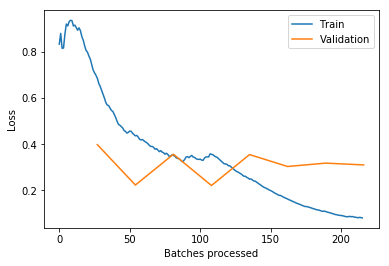

In [0]:
learn.recorder.plot_losses()

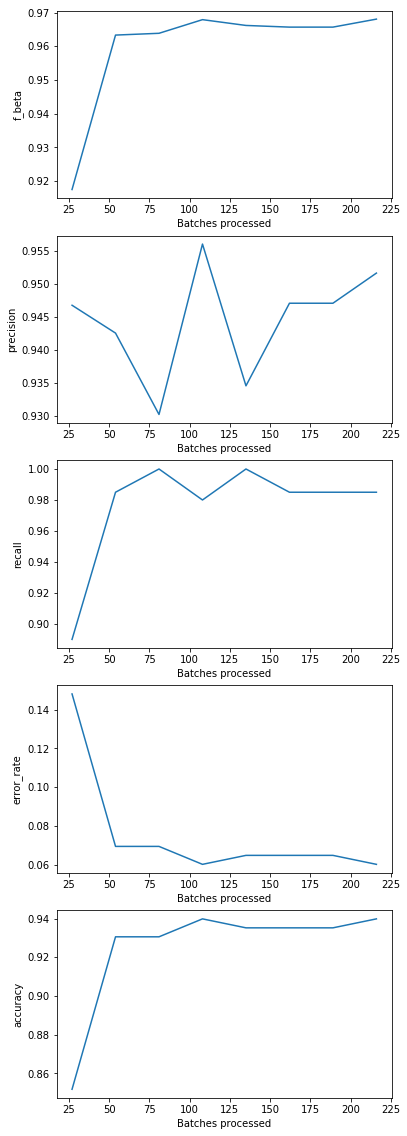

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1') #.968

In [0]:
#go back to learn.fit_one_cycle(...)

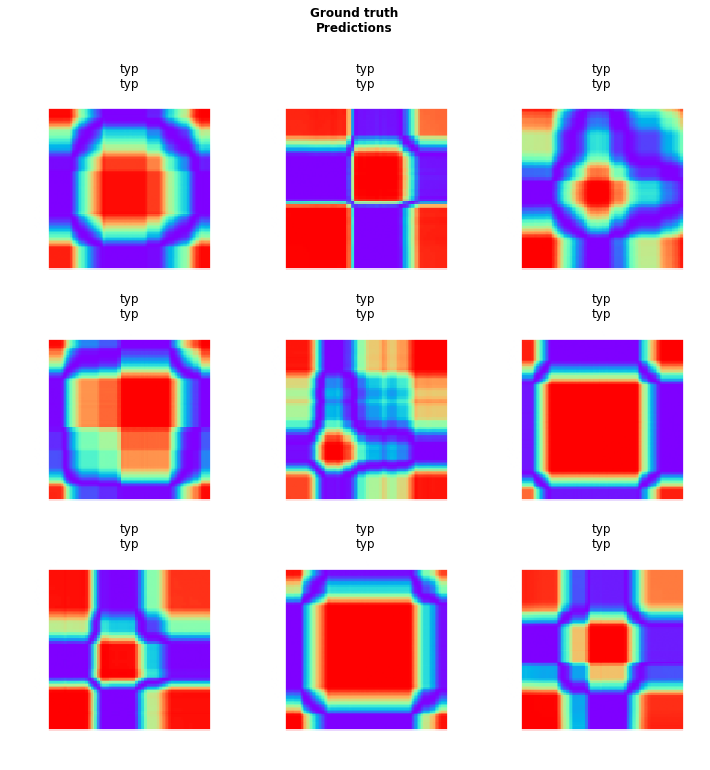

In [0]:
learn.show_results(rows=3)

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (864 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Valid: LabelList (216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


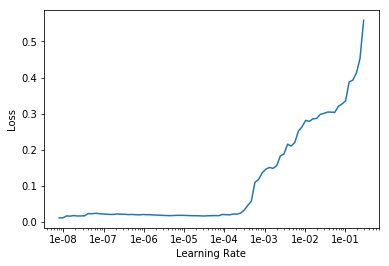

In [0]:
# learn.lr_find()
# learn.lr_find(stop_div=False)
learn.lr_find(start_lr=1e-9, end_lr=1e-0, stop_div=False)
learn.recorder.plot()

In [0]:
lrf = 2e-2 #at steepest part of curve (that was used above)
# lru = 1e-8 #at least an order below the minimum
# learn.fit_one_cycle(4, slice(lru, lrf/10))

# learn.fit_one_cycle(16, slice(1e-8, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-7, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-6, lrf/10)) #
# learn.fit_one_cycle(16, slice(2e-6, lrf/10)) #
# learn.fit_one_cycle(32, slice(5e-6, lrf/10)) #

learn.fit_one_cycle(8, slice(1e-5, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-8, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-7, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-6, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-5, lrf/5)) #

epoch,train_loss,valid_loss,f_beta,precision,recall,error_rate,accuracy,time
0,0.021847,0.444732,0.943878,0.963542,0.925000,0.101852,0.898148,00:09
1,0.127530,0.676902,0.899225,0.930481,0.870000,0.180556,0.819444,00:09
2,0.223815,0.168788,0.967742,0.960591,0.975000,0.060185,0.939815,00:09
3,0.170038,0.190929,0.977887,0.961353,0.995000,0.041667,0.958333,00:09
4,0.121115,0.111758,0.985222,0.970874,1.000000,0.027778,0.972222,00:09
5,0.080419,0.181571,0.982801,0.966184,1.000000,0.032407,0.967593,00:09
6,0.050483,0.189222,0.982801,0.966184,1.000000,0.032407,0.967593,00:09
7,0.033183,0.185519,0.982801,0.966184,1.000000,0.032407,0.967593,00:09


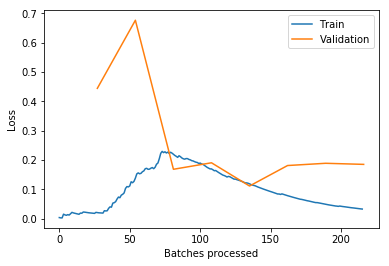

In [0]:
learn.recorder.plot_losses()

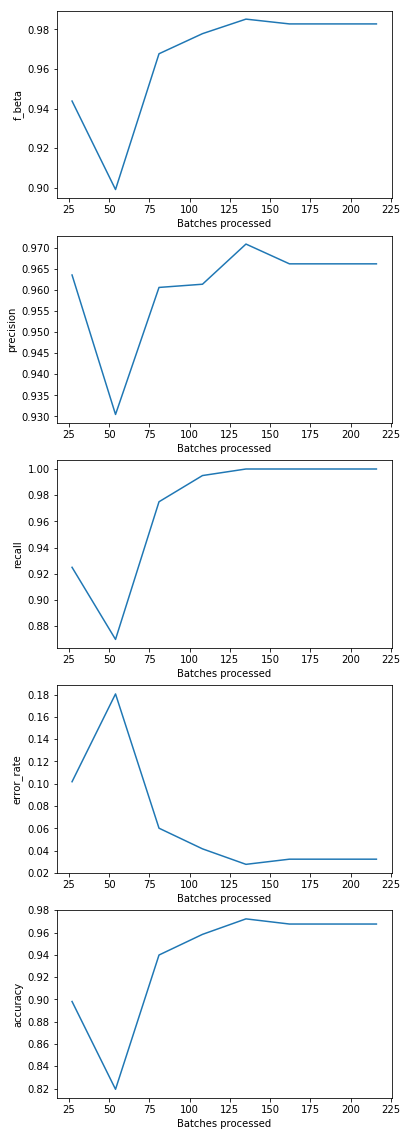

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-2') #.982

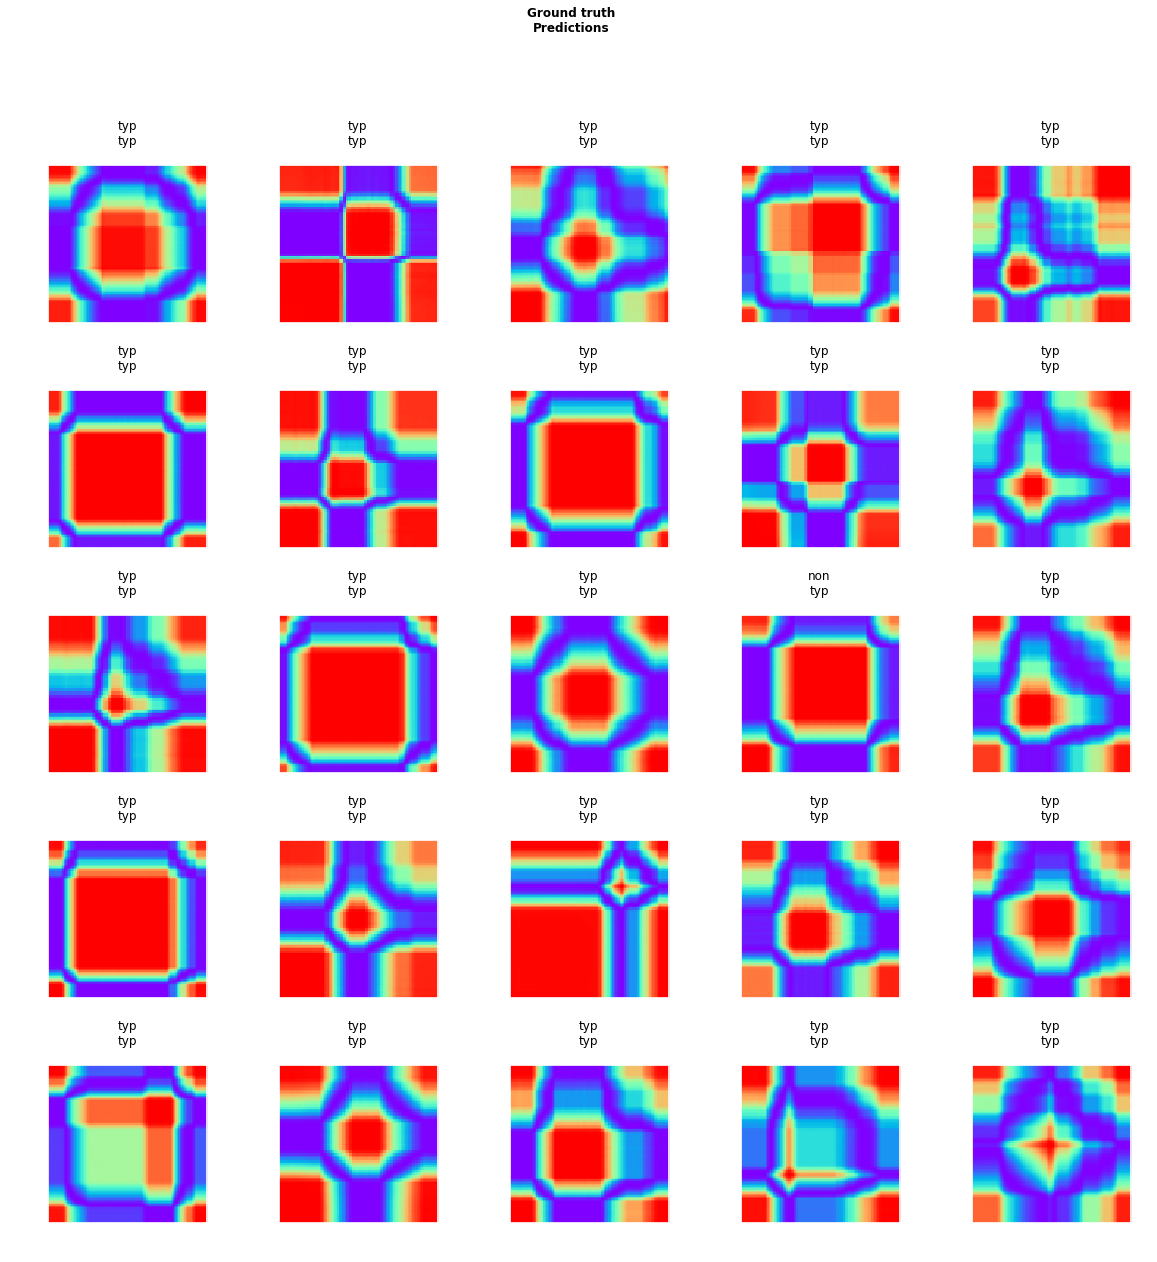

In [0]:
learn.show_results()

## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (864 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Valid: LabelList (216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3b;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

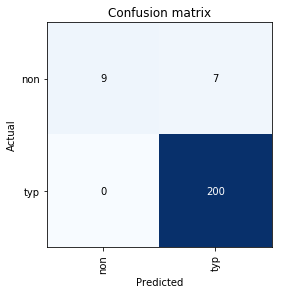

In [0]:
interp.plot_confusion_matrix() #216 items in validation set

In [0]:
TP = 200 #True Positives
FP = 7 #False Positives
FN = 0 #False Negatives
precision = TP/(TP + FP) #TP / prediction positives
recall = TP/(TP + FN) #TP / actual positives
F1_score = 2*( (precision*recall) / (precision+recall) )
precision,recall,F1_score

(0.966183574879227, 1.0, 0.9828009828009828)

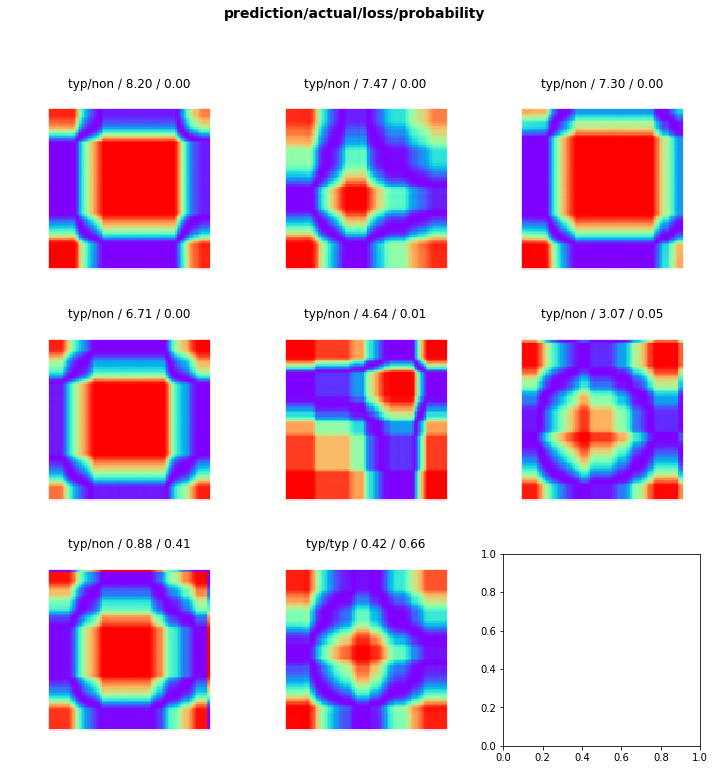

In [0]:
interp.plot_top_losses(8)

## Test Inference/Production (on train data)

In [0]:
learn.export()

In [0]:
!ls -altrh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep 17 17:52 '/content/gdrive/My Drive/dashlink/Train/png3b/export.pkl'


In [0]:
!ls "{trnpath}"/{outpath}/non

687200104201603-1min.png  687200107251920-1min.png  687200108222148-1min.png
687200104231716-1min.png  687200107260900-1min.png  687200108232302-1min.png
687200104241309-1min.png  687200107271412-1min.png  687200108281634-1min.png
687200107040653-1min.png  687200107280607-1min.png  687200108312039-1min.png
687200107041424-1min.png  687200107282131-1min.png  687200109041600-1min.png
687200107051019-1min.png  687200107291717-1min.png  687200109071716-1min.png
687200107061455-1min.png  687200107302302-1min.png  687200109111355-1min.png
687200107061632-1min.png  687200107312026-1min.png  687200109111953-1min.png
687200107081722-1min.png  687200107312325-1min.png  687200109141623-1min.png
687200107082004-1min.png  687200108011714-1min.png  687200109181713-1min.png
687200107091957-1min.png  687200108021547-1min.png  687200109211703-1min.png
687200107092152-1min.png  687200108031503-1min.png  687200109231648-1min.png
687200107101259-1min.png  687200108042135-1min.png  687200109241650-1min.png

In [0]:
learn = load_learner(trnpath/outpath)

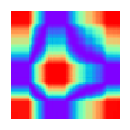

In [0]:
# img = open_image(trnpath/outpath/'non'/'687200108162131-1min.png'); img
# img = open_image(trnpath/outpath/'non'/'687200108221706-1min.png'); img #wrong
# img = open_image(trnpath/outpath/'non'/'687200107251652-1min.png'); img
# img = open_image(trnpath/outpath/'non'/'687200112191008-1min.png'); img #wrong
# img = open_image(trnpath/outpath/'non'/'687200108202243-1min.png'); img
img = open_image(trnpath/outpath/'non'/'687200107241645-1min.png'); img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs

(Category non, tensor(0), tensor([0.9841, 0.0159]))